Capstone Project - The Battle of Neighborhoods in Perth

Load environments

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

import json
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported')

Libraries imported


Scarpe data from the URL provided then converting it to CSV file.
URL: https://www.matthewproctor.com/full_australian_postcodes_wa.

After running the code, 3 tables were created. Table 0, 1 and 2.
Table 0 is the one that contains Postcode, Locality, State, Longitude and Latitude.

In [51]:
import requests
my_url = 'https://www.matthewproctor.com/full_australian_postcodes_wa'
        
html = requests.get(my_url).content
df_list = pd.read_html(html)

for i, df in enumerate(df_list):
    print (df)
    df.to_csv('table {}.csv'.format(i))

         0         1                                    2      3   \
0        ID  Postcode                             Locality  State   
1       414      0872                  GIBSON DESERT NORTH     WA   
2     20143      0872                  GIBSON DESERT SOUTH     WA   
3     20156      0872                          KIWIRRKURRA     WA   
4     20169      0872                  NGAANYATJARRA-GILES     WA   
5     20173      0872                              PATJARR     WA   
6     20183      0872                           TJIRRKARLI     WA   
7     20184      0872                             TJUKURLA     WA   
8       444      0872                            WARAKURNA     WA   
9     20190      0872                           WINGELLINA     WA   
10    10026      6000                 CITY DELIVERY CENTRE     WA   
11    10027      6000                                PERTH     WA   
12    10028      6000                            PERTH GPO     WA   
13    10029      6001             

In [52]:
import pandas as pd

df= pd.read_csv('table 0.csv', usecols= [2,3,4,5,6])
df_perth = df
df_perth.head()

,1,2,3,4,5
0,Postcode,Locality,State,Longitude,Latitude
1,0872,GIBSON DESERT NORTH,WA,131.298809,-21.949513
2,0872,GIBSON DESERT SOUTH,WA,125.9841842,-24.94725917
3,0872,KIWIRRKURRA,WA,126.954107,-23.2807675
4,0872,NGAANYATJARRA-GILES,WA,128.1150802,-25.27073166


In [53]:
df_perth = pd.DataFrame(df_perth)
df_perth.head()

,1,2,3,4,5
0,Postcode,Locality,State,Longitude,Latitude
1,0872,GIBSON DESERT NORTH,WA,131.298809,-21.949513
2,0872,GIBSON DESERT SOUTH,WA,125.9841842,-24.94725917
3,0872,KIWIRRKURRA,WA,126.954107,-23.2807675
4,0872,NGAANYATJARRA-GILES,WA,128.1150802,-25.27073166


Replaced the dataframe column name then droped the first row using drop function,

In [54]:
df_perth.columns = ['Postcode', 'Locality', 'State', 'Longitude', 'Latitude']
print(df_perth.columns)

Index(['Postcode', 'Locality', 'State', 'Longitude', 'Latitude'], dtype='object')


In [55]:
df_perth.head()

,Postcode,Locality,State,Longitude,Latitude
0,Postcode,Locality,State,Longitude,Latitude
1,0872,GIBSON DESERT NORTH,WA,131.298809,-21.949513
2,0872,GIBSON DESERT SOUTH,WA,125.9841842,-24.94725917
3,0872,KIWIRRKURRA,WA,126.954107,-23.2807675
4,0872,NGAANYATJARRA-GILES,WA,128.1150802,-25.27073166


In [56]:
df_perth.drop([0], inplace=True)
df_perth

,Postcode,Locality,State,Longitude,Latitude
1,0872,GIBSON DESERT NORTH,WA,131.298809,-21.949513
2,0872,GIBSON DESERT SOUTH,WA,125.9841842,-24.94725917
3,0872,KIWIRRKURRA,WA,126.954107,-23.2807675
4,0872,NGAANYATJARRA-GILES,WA,128.1150802,-25.27073166
5,0872,PATJARR,WA,131.6138326,-23.4686864
6,0872,TJIRRKARLI,WA,125.3466253,-25.9752687
7,0872,TJUKURLA,WA,128.656027,-24.343546
8,0872,WARAKURNA,WA,131.298809,-21.949513
9,0872,WINGELLINA,WA,131.6138326,-23.4686864
10,6000,CITY DELIVERY CENTRE,WA,115.859912,-31.948762


Checked dataframe shape, droped NaaN values using dropna function.
Dropped duplicates in both the Postcode and Locality column.

In [57]:
df_perth.shape

(1925, 5)

In [58]:
df_perth.dropna(inplace = True)

In [59]:
df_perth.shape

(1918, 5)

In [60]:
df_perth.drop_duplicates(subset='Postcode', inplace = True)

In [61]:
df_perth.drop_duplicates(subset='Locality', inplace = True)

In [62]:
df_perth.shape

(445, 5)

In [63]:
df_perth

,Postcode,Locality,State,Longitude,Latitude
1,0872,GIBSON DESERT NORTH,WA,131.298809,-21.949513
10,6000,CITY DELIVERY CENTRE,WA,115.859912,-31.948762
13,6001,PERTH,WA,115.763228,-31.99212
14,6003,HIGHGATE,WA,115.869136,-31.939272
16,6004,EAST PERTH,WA,115.874601,-31.956931
17,6005,KINGS PARK,WA,115.836896,-31.95707
19,6006,NORTH PERTH,WA,115.852913,-31.92934
20,6007,LEEDERVILLE,WA,115.834335,-31.935675
22,6008,DAGLISH,WA,115.811432,-31.956599
26,6009,BROADWAY NEDLANDS,WA,115.804692,-31.985791


Droped row 1852 as value shows 0

In [64]:
df_perth.drop([1852], inplace=True)

In [65]:
df_perth.shape

(444, 5)

In [74]:
from geopy.geocoders import Nominatim
import requests

locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('Perth, Australia')

print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))

Latitude = -31.9527121, Longitude = 115.8604796


Checked dataframe types and converted both the Longitude and Latitude from object to float using the astype function.

In [67]:
df_perth.dtypes

Postcode     object
Locality     object
State        object
Longitude    object
Latitude     object
dtype: object

In [68]:
df_perth = df_perth.astype({'Longitude': float, 'Latitude':float})

In [69]:
df_perth.dtypes

Postcode      object
Locality      object
State         object
Longitude    float64
Latitude     float64
dtype: object

In [182]:
address = 'Perth, WA'
geolocator = Nominatim(user_agent='wa_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Perth, are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Perth, are -31.9527121, 115.8604796.


Map visualization of Perth.

In [78]:
# create map of Perth using latitude and longitude values
map_perth = folium.Map(location=[latitude, longitude], zoom_start=11)

 # add markers to map
for lat, lng, label in zip(df_perth['Latitude'], df_perth['Longitude'], df_perth['Locality']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_perth) 
    
map_perth

Next, we would use the Foursquare API to explore the neighborhoods.
Foursquare credential should be defined.

In [79]:
CLIENT_ID = 'YRCY5L51OX0UJVJMT3D0RE1AXZ3Y0KYFWY5Z2I2YEREP1GHO'
CLIENT_SECRET = 'YCKS1ZSCDUMLEI1FCWGQKSZBYQD00AEXE124JGV0CFUAMDOH'
VERSION = '20201411'
LIMIT = 100

print('Your credentials:')
print('Client ID:'+ CLIENT_ID)
print('Client Secret:' + CLIENT_SECRET)

Your credentials:
Client ID:YRCY5L51OX0UJVJMT3D0RE1AXZ3Y0KYFWY5Z2I2YEREP1GHO
Client Secret:YCKS1ZSCDUMLEI1FCWGQKSZBYQD00AEXE124JGV0CFUAMDOH


In [81]:
df_perth.loc[13,'Locality']

'PERTH'

In [82]:
print('The dataframe has {} localities and {} postcodes.'.format(
    len(df_perth['Locality'].unique()),
    df_perth.shape[0]
    ))

The dataframe has 444 localities and 444 postcodes.


In [83]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=YRCY5L51OX0UJVJMT3D0RE1AXZ3Y0KYFWY5Z2I2YEREP1GHO&client_secret=YCKS1ZSCDUMLEI1FCWGQKSZBYQD00AEXE124JGV0CFUAMDOH&v=20201411&ll=-31.9527121,115.8604796&radius=500&limit=100'

In [84]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fc791d979c81d6dc1dd1dad'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Perth CBD',
  'headerFullLocation': 'Perth CBD, Perth',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 74,
  'suggestedBounds': {'ne': {'lat': -31.948212095499994,
    'lng': 115.8657732723709},
   'sw': {'lat': -31.957212104500005, 'lng': 115.85518592762911}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5174a530e4b01f6b11e2af64',
       'name': 'Toastface Grillah',
       'location': {'address': 'Grand Theatre Ln',
        'lat': -31.952441138609295,
        'lng': 115.86096363871788,
        'labeledLatLngs': [{'label': 'display',
          'lat':

In [85]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [92]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split('.')[-1] for col in nearby_venues.columns]
nearby_venues

<ipython-input-92-7df7f696ac4c>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


,name,categories,lat,lng
0,Toastface Grillah,Sandwich Place,-31.952441,115.860964
1,Le Vietnam,Vietnamese Restaurant,-31.954256,115.860512
2,Twilight Hawkers Markets,Food Truck,-31.953079,115.859452
3,Max + Sons,Coffee Shop,-31.951645,115.858371
4,Ribs & Burgers,Burger Joint,-31.951655,115.858375
5,Palsaik,Korean Restaurant,-31.954315,115.860515
6,Alfred's Pizzeria & Smallbar,Pizza Place,-31.954890,115.859901
7,lululemon,Clothing Store,-31.952688,115.860083
8,Petition Kitchen,Bistro,-31.955222,115.860066
9,Jaws,Sushi Restaurant,-31.954896,115.860846


In [93]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

74 venues were returned by Foursquare.


Using the foursquare API, we would now explore neighborhoods in Perth

In [95]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude',  
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [96]:
# type your answer here
perth_venues = getNearbyVenues(names=df_perth['Locality'],
                                   latitudes=df_perth['Latitude'],
                                   longitudes=df_perth['Longitude']
                                  )

GIBSON DESERT NORTH
CITY DELIVERY CENTRE
PERTH
HIGHGATE
EAST PERTH
KINGS PARK
NORTH PERTH
LEEDERVILLE
DAGLISH
BROADWAY NEDLANDS
CLAREMONT
COTTESLOE
MOSMAN PARK
FLOREAT
CITY BEACH
GLENDALOUGH
HERDSMAN
CHURCHLANDS
SCARBOROUGH
CARINE
BALCATTA
HAMERSLEY
DUNCRAIG
GREENWOOD
CRAIGIE
KINGSLEY
BELDON
BURNS BEACH
TRIGG
CLARKSON
BANKSIA GROVE
NOWERGUP
CARABOODA
EGLINTON
YANCHEP
BUTLER
TWO ROCKS
ALKIMOS
CARABAN
SEABIRD
BRETON BAY
KARAKIN
COOLBINIA
MAYLANDS
BEDFORD
BAYSWATER
ASHFIELD
BRABHAM
BASKERVILLE
HIGH WYCOMBE
FORRESTFIELD
DIANELLA
DOG SWAMP
BALGA
EMBLETON
BEECHBORO
ALEXANDER HEIGHTS
ASHBY
BALLAJURA
CULLACABARDEE
WHITEMAN
AVELEY
DARLINGTON
GLEN FORREST
MAHOGANY CREEK
MUNDARING
SAWYERS VALLEY
BICKLEY
GNANGARA
MARIGINIUP
LEXIA
PARKERVILLE
BAILUP
GIDGEGANNUP
AVON VALLEY NATIONAL PARK
MALAGA
BURSWOOD
CARLISLE
BENTLEY
RIVERVALE
ASCOT
CLOVERDALE
WELSHPOOL
BECKENHAM
THORNLIE
MADDINGTON
GOSNELLS
ASHENDON
ARMADALE
OAKFORD
BYFORD
MUNDIJONG
JARRAHDALE
HOPELAND
KEYSBROOK
LANGFORD
FERNDALE
BULL CREEK
BATE

In [98]:
Perth_Venues_only_restaurant = perth_venues[perth_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Perth_Venues_only_restaurant.index = np.arange(1, len(Perth_Venues_only_restaurant )+1)

In [99]:
print (Perth_Venues_only_restaurant['Venue Category'].value_counts())

Fast Food Restaurant             37
Asian Restaurant                 19
Chinese Restaurant               18
Japanese Restaurant              14
Restaurant                       14
Indian Restaurant                13
Italian Restaurant               11
Mexican Restaurant               10
Seafood Restaurant                9
Vietnamese Restaurant             8
Thai Restaurant                   8
Australian Restaurant             8
Vegetarian / Vegan Restaurant     7
Portuguese Restaurant             7
Malay Restaurant                  6
Middle Eastern Restaurant         4
Sushi Restaurant                  4
Tapas Restaurant                  4
Indonesian Restaurant             3
Korean BBQ Restaurant             3
African Restaurant                3
Greek Restaurant                  3
Ramen Restaurant                  3
Korean Restaurant                 2
Eastern European Restaurant       2
Dim Sum Restaurant                2
French Restaurant                 1
Turkish Restaurant          

In [100]:
print('There are {} uniques categories.'.format(len(Perth_Venues_only_restaurant['Venue Category'].unique())))

There are 32 uniques categories.


In [101]:
# create a dataframe of top 10 categories
Perth_5_Dist_Venues_Top10 = Perth_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Perth_5_Dist_Venues_Top10=Perth_5_Dist_Venues_Top10.reset_index()
#Tokyo_5_Dist_Venues_Top10

Perth_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Perth_5_Dist_Venues_Top10

,Venue_Category,Frequency
0,Fast Food Restaurant,37
1,Asian Restaurant,19
2,Chinese Restaurant,18
3,Japanese Restaurant,14
4,Restaurant,14
5,Indian Restaurant,13
6,Italian Restaurant,11
7,Mexican Restaurant,10
8,Seafood Restaurant,9
9,Vietnamese Restaurant,8


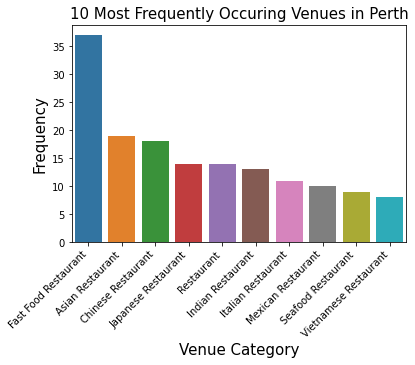

<Figure size 1296x504 with 0 Axes>

In [102]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Perth_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in Perth', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [103]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Perth_Venues_only_restaurant.shape)
Perth_Venues_only_restaurant.head(10)

Shape of the Data-Frame with Venue Category only Restaurant:  (228, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,CITY DELIVERY CENTRE,-31.948762,115.859912,The Hummus Club,-31.947838,115.860170,Middle Eastern Restaurant
2,CITY DELIVERY CENTRE,-31.948762,115.859912,Lot Twenty,-31.949247,115.859537,Restaurant
3,CITY DELIVERY CENTRE,-31.948762,115.859912,Tra Vinh,-31.946845,115.860739,Vietnamese Restaurant
4,CITY DELIVERY CENTRE,-31.948762,115.859912,Utopia Square,-31.948567,115.857700,Vegetarian / Vegan Restaurant
5,CITY DELIVERY CENTRE,-31.948762,115.859912,Authentic Bites Dumpling House 真真小笼,-31.946900,115.861850,Chinese Restaurant
6,CITY DELIVERY CENTRE,-31.948762,115.859912,Sauma,-31.949154,115.859304,Indian Restaurant
7,CITY DELIVERY CENTRE,-31.948762,115.859912,U&I Cafe,-31.948066,115.859759,Asian Restaurant
8,CITY DELIVERY CENTRE,-31.948762,115.859912,Dragon Palace & Karaoke Restaurant,-31.947489,115.858610,Chinese Restaurant
9,CITY DELIVERY CENTRE,-31.948762,115.859912,Nando's,-31.951525,115.857978,Portuguese Restaurant
10,CITY DELIVERY CENTRE,-31.948762,115.859912,Guzman y Gomez,-31.948783,115.858379,Mexican Restaurant


In [104]:
Perth_Venues_restaurant = Perth_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

Anayze each neighborhood

In [105]:
Perth_Venues_restaurant

Neighborhood
ALFRED COVE                   1
ALKIMOS                       1
APPLECROSS                    2
ATWELL                        5
AUSTRALIND                    1
BALGA                         1
BALLAJURA                     1
BATEMAN                       2
BAYSWATER                     2
BECKENHAM                     1
BELMONT                       8
BIBRA LAKE                    1
BIBRA LAKE DC                 1
BICTON                        3
BOORAGOON                     1
BULL CREEK                    2
BURSWOOD                     13
BYFORD                        1
CANNINGTON                    1
CARINE                        1
CARLISLE                     14
CITY DELIVERY CENTRE         15
CLARKSON                      3
COOLBINIA                     6
CRAIGIE                       1
DAGLISH                       1
DOG SWAMP                     1
EAST FREMANTLE                1
EAST PERTH                    8
EAST VICTORIA PARK            6
EMBLETON                   

In [108]:
Perth_Venues_restaurant_df  = Perth_Venues_restaurant.to_frame().reset_index()
Perth_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Perth_Venues_restaurant_df.index = np.arange(1, len(Perth_Venues_restaurant_df)+1)
list_rest_no =Perth_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =Perth_Venues_restaurant_df['Neighborhood'].to_list()
print(list_rest_no)
print(list_dist)

[1, 1, 2, 5, 1, 1, 1, 2, 2, 1, 8, 1, 1, 3, 1, 2, 13, 1, 1, 1, 14, 15, 3, 6, 1, 1, 1, 1, 8, 6, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 9, 1, 4, 1, 2, 2, 1, 1, 3, 3, 1, 5, 9, 2, 3, 3, 1, 12, 27, 1, 1, 2, 1, 4, 1, 2, 2, 1, 2, 1, 1]
['ALFRED COVE', 'ALKIMOS', 'APPLECROSS', 'ATWELL', 'AUSTRALIND', 'BALGA', 'BALLAJURA', 'BATEMAN', 'BAYSWATER', 'BECKENHAM', 'BELMONT', 'BIBRA LAKE', 'BIBRA LAKE DC', 'BICTON', 'BOORAGOON', 'BULL CREEK', 'BURSWOOD', 'BYFORD', 'CANNINGTON', 'CARINE', 'CARLISLE', 'CITY DELIVERY CENTRE', 'CLARKSON', 'COOLBINIA', 'CRAIGIE', 'DAGLISH', 'DOG SWAMP', 'EAST FREMANTLE', 'EAST PERTH', 'EAST VICTORIA PARK', 'EMBLETON', 'FERNDALE', 'FLOREAT', 'FORRESTFIELD', 'FREMANTLE', 'GERALDTON', 'GOSNELLS', 'GREENWOOD', 'GUILDFORD', 'HAMERSLEY', 'HERDSMAN', 'HIGHGATE', 'HILLARYS', 'INGLEWOOD', 'KARRINYUP', 'KINGSLEY', 'LANGFORD', 'MALAGA', 'MAYLANDS', 'MOUNT HAWTHORN', 'MOUNT LAWLEY', 'NORTH FREMANTLE', 'NORTH PERTH', 'NORTHBRIDGE', 'OSBORNE PARK', 'PALMYRA', 'PALMYRA DC', 'PARKERVILLE', 'PER

In [123]:
# one hot encoding
perth_onehot = pd.get_dummies(Perth_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
perth_onehot['Neighborhood'] = Perth_Venues_only_restaurant['Neighborhood']

# move neighborhood column to the first column
perth_onehot.head()

,Afghan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Halal Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean BBQ Restaurant,Korean Restaurant,Malay Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,South American Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Neighborhood
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,CITY DELIVERY CENTRE
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,CITY DELIVERY CENTRE
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,CITY DELIVERY CENTRE
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,CITY DELIVERY CENTRE
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CITY DELIVERY CENTRE


In [124]:
perth_onehot.shape

(228, 33)

Next, let's group rows by neighborhood and take the mean of the efrequency of occurance of each category.

In [125]:
perth_grouped = perth_onehot.groupby('Neighborhood').mean().reset_index()
perth_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Halal Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean BBQ Restaurant,Korean Restaurant,Malay Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,South American Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,ALFRED COVE,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,ALKIMOS,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,APPLECROSS,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.00,0.000000,0.000000
3,ATWELL,0.0,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000,0.0,0.000000,0.000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,AUSTRALIND,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
5,BALGA,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.000000
6,BALLAJURA,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
7,BATEMAN,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
8,BAYSWATER,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.500000,0.00,0.000000,0.000000
9,BECKENHAM,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000


In [126]:
perth_grouped.shape

(72, 33)

Lets print each neighborhood along with the top 5 most common venues

In [127]:
num_top_venues = 5

for hood in perth_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = perth_grouped[perth_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ALFRED COVE----
                           venue  freq
0           Fast Food Restaurant   1.0
1              Afghan Restaurant   0.0
2              Korean Restaurant   0.0
3  Vegetarian / Vegan Restaurant   0.0
4             Turkish Restaurant   0.0


----ALKIMOS----
                           venue  freq
0              Indian Restaurant   1.0
1              Afghan Restaurant   0.0
2              Korean Restaurant   0.0
3  Vegetarian / Vegan Restaurant   0.0
4             Turkish Restaurant   0.0


----APPLECROSS----
                           venue  freq
0                Thai Restaurant   0.5
1            Japanese Restaurant   0.5
2              Afghan Restaurant   0.0
3              Korean Restaurant   0.0
4  Vegetarian / Vegan Restaurant   0.0


----ATWELL----
                   venue  freq
0   Fast Food Restaurant   0.2
1     Chinese Restaurant   0.2
2     Italian Restaurant   0.2
3  Portuguese Restaurant   0.2
4     Mexican Restaurant   0.2


----AUSTRALIND----
               

4   Fast Food Restaurant   0.2


----NORTHBRIDGE----
                         venue  freq
0           Mexican Restaurant  0.22
1  Eastern European Restaurant  0.11
2        Portuguese Restaurant  0.11
3            Indian Restaurant  0.11
4                   Restaurant  0.11


----OSBORNE PARK----
                       venue  freq
0       Fast Food Restaurant   0.5
1           Asian Restaurant   0.5
2  South American Restaurant   0.0
3         Mexican Restaurant   0.0
4  Middle Eastern Restaurant   0.0


----PALMYRA----
                  venue  freq
0  Fast Food Restaurant  0.33
1   Japanese Restaurant  0.33
2    African Restaurant  0.33
3    Turkish Restaurant  0.00
4       Thai Restaurant  0.00


----PALMYRA DC----
                  venue  freq
0  Fast Food Restaurant  0.33
1   Japanese Restaurant  0.33
2    African Restaurant  0.33
3    Turkish Restaurant  0.00
4       Thai Restaurant  0.00


----PARKERVILLE----
                           venue  freq
0              Indian Restaurant

In [128]:
#First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Let's now create a new dataframe and display the top 10 venues for each neighborhood.

In [141]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = perth_grouped['Neighborhood']

for ind in np.arange(perth_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(perth_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALFRED COVE,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
1,ALKIMOS,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
2,APPLECROSS,Japanese Restaurant,Thai Restaurant,Italian Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
3,ATWELL,Portuguese Restaurant,Chinese Restaurant,Mexican Restaurant,Italian Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant
4,AUSTRALIND,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
5,BALGA,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant
6,BALLAJURA,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
7,BATEMAN,Asian Restaurant,Malay Restaurant,Vietnamese Restaurant,Italian Restaurant,African Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
8,BAYSWATER,Thai Restaurant,Seafood Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Dim Sum Restaurant
9,BECKENHAM,Seafood Restaurant,Vietnamese Restaurant,Italian Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant


Clustering Neighborhoods.

Run k-means to cluster the neighborhood into 6 clusters.

In [145]:
# set number of clusters
kclusters = 6

perth_grouped_clustering = perth_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(perth_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([0, 4, 4, 4, 0, 4, 0, 4, 1, 1])

In [150]:
df_perth

,Postcode,Locality,State,Longitude,Latitude
1,0872,GIBSON DESERT NORTH,WA,131.298809,-21.949513
10,6000,CITY DELIVERY CENTRE,WA,115.859912,-31.948762
13,6001,PERTH,WA,115.763228,-31.992120
14,6003,HIGHGATE,WA,115.869136,-31.939272
16,6004,EAST PERTH,WA,115.874601,-31.956931
17,6005,KINGS PARK,WA,115.836896,-31.957070
19,6006,NORTH PERTH,WA,115.852913,-31.929340
20,6007,LEEDERVILLE,WA,115.834335,-31.935675
22,6008,DAGLISH,WA,115.811432,-31.956599
26,6009,BROADWAY NEDLANDS,WA,115.804692,-31.985791


Let us create a new dataframe the includes the cluster as well as the top 10 venues for each neighborhood.

In [184]:
perth_grouped_clustering

,Afghan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Halal Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean BBQ Restaurant,Korean Restaurant,Malay Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,South American Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.00,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000,0.0,0.000000,0.000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.000000
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
7,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.500000,0.00,0.000000,0.000000
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000


In [154]:
# add clustering labels

#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

perth_merged = df_perth

perth_merged.rename(columns={'Locality':'Neighborhood'}, inplace=True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
perth_merged = perth_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

perth_merged.head() # check the last columns!

,Postcode,Neighborhood,State,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,0872,GIBSON DESERT NORTH,WA,131.298809,-21.949513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,6000,CITY DELIVERY CENTRE,WA,115.859912,-31.948762,4.0,Chinese Restaurant,Vietnamese Restaurant,Ramen Restaurant,Asian Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Japanese Restaurant
13,6001,PERTH,WA,115.763228,-31.992120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,6003,HIGHGATE,WA,115.869136,-31.939272,4.0,Mexican Restaurant,Eastern European Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Fast Food Restaurant,Restaurant,Indian Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Greek Restaurant
16,6004,EAST PERTH,WA,115.874601,-31.956931,4.0,Indian Restaurant,Japanese Restaurant,Italian Restaurant,Asian Restaurant,Chinese Restaurant,Restaurant,Greek Restaurant,African Restaurant,Australian Restaurant,Dim Sum Restaurant


In [158]:
perth_merged.dropna(inplace = True)

In [159]:
perth_merged

,Postcode,Neighborhood,State,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,6000,CITY DELIVERY CENTRE,WA,115.859912,-31.948762,4.0,Chinese Restaurant,Vietnamese Restaurant,Ramen Restaurant,Asian Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Japanese Restaurant
14,6003,HIGHGATE,WA,115.869136,-31.939272,4.0,Mexican Restaurant,Eastern European Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Fast Food Restaurant,Restaurant,Indian Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Greek Restaurant
16,6004,EAST PERTH,WA,115.874601,-31.956931,4.0,Indian Restaurant,Japanese Restaurant,Italian Restaurant,Asian Restaurant,Chinese Restaurant,Restaurant,Greek Restaurant,African Restaurant,Australian Restaurant,Dim Sum Restaurant
19,6006,NORTH PERTH,WA,115.852913,-31.929340,4.0,Italian Restaurant,Asian Restaurant,Fast Food Restaurant,Portuguese Restaurant,Indian Restaurant,Vietnamese Restaurant,African Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant
22,6008,DAGLISH,WA,115.811432,-31.956599,4.0,French Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
39,6014,FLOREAT,WA,115.808169,-31.936389,1.0,Malay Restaurant,Seafood Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Dumpling Restaurant
46,6017,HERDSMAN,WA,115.814562,-31.908357,3.0,Australian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant
56,6019,SCARBOROUGH,WA,115.769183,-31.907330,0.0,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
58,6020,CARINE,WA,115.765396,-31.852698,0.0,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
65,6022,HAMERSLEY,WA,115.809240,-31.851998,4.0,Middle Eastern Restaurant,Vietnamese Restaurant,Italian Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant


Let us convert the cluster label from float to int using the astype function.

Visualize resulting clusters.

In [176]:
perth_merged.dtypes

Postcode                   object
Neighborhood               object
State                      object
Longitude                 float64
Latitude                  float64
Cluster Labels            float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [177]:
perth_merged = perth_merged.astype({'Cluster Labels': int})

In [181]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
#Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

# add markers to the map
for lat, lon, poi, cluster in zip(perth_merged['Latitude'], 
                                  perth_merged['Longitude'], 
                                  perth_merged['Neighborhood'], 
                                  perth_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*2,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

Examining the clusters.

Cluster 1

In [162]:
perth_merged.loc[perth_merged['Cluster Labels'] == 0, perth_merged.columns[[1] + list(range(5, perth_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
56,SCARBOROUGH,0.0,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
58,CARINE,0.0,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
70,CRAIGIE,0.0,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
74,KINGSLEY,0.0,Thai Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Italian Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant
89,CLARKSON,0.0,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
159,FORRESTFIELD,0.0,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
197,BALLAJURA,0.0,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
244,MALAGA,0.0,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
303,BYFORD,0.0,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
321,BULL CREEK,0.0,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant


Cluster 2

In [164]:
perth_merged.loc[perth_merged['Cluster Labels'] == 1, perth_merged.columns[[1] + list(range(5, perth_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,FLOREAT,1.0,Malay Restaurant,Seafood Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Dumpling Restaurant
88,TRIGG,1.0,Seafood Restaurant,Vietnamese Restaurant,Italian Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
124,BAYSWATER,1.0,Thai Restaurant,Seafood Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Dim Sum Restaurant
265,BECKENHAM,1.0,Seafood Restaurant,Vietnamese Restaurant,Italian Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
361,BIBRA LAKE,1.0,Seafood Restaurant,Vietnamese Restaurant,Italian Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
1859,WEMBLEY,1.0,Malay Restaurant,Seafood Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Dumpling Restaurant
1905,BIBRA LAKE DC,1.0,Seafood Restaurant,Vietnamese Restaurant,Italian Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
1912,CANNINGTON,1.0,Seafood Restaurant,Vietnamese Restaurant,Italian Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant


Cluster 3

In [166]:
perth_merged.loc[perth_merged['Cluster Labels'] == 2, perth_merged.columns[[1] + list(range(5, perth_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1843,WEST PERTH,2.0,Indonesian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
1846,WEST LEEDERVILLE,2.0,Indonesian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant


Cluster 4

In [167]:
perth_merged.loc[perth_merged['Cluster Labels'] == 3, perth_merged.columns[[1] + list(range(5, perth_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
46,HERDSMAN,3.0,Australian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant
121,MAYLANDS,3.0,Australian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant
170,EMBLETON,3.0,Chinese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant
317,FERNDALE,3.0,Australian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant
421,SINGLETON,3.0,Chinese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant
1484,GERALDTON,3.0,Chinese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant


Cluster 5

In [168]:
perth_merged.loc[perth_merged['Cluster Labels'] == 4, perth_merged.columns[[1] + list(range(5, perth_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,CITY DELIVERY CENTRE,4.0,Chinese Restaurant,Vietnamese Restaurant,Ramen Restaurant,Asian Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Japanese Restaurant
14,HIGHGATE,4.0,Mexican Restaurant,Eastern European Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Fast Food Restaurant,Restaurant,Indian Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Greek Restaurant
16,EAST PERTH,4.0,Indian Restaurant,Japanese Restaurant,Italian Restaurant,Asian Restaurant,Chinese Restaurant,Restaurant,Greek Restaurant,African Restaurant,Australian Restaurant,Dim Sum Restaurant
19,NORTH PERTH,4.0,Italian Restaurant,Asian Restaurant,Fast Food Restaurant,Portuguese Restaurant,Indian Restaurant,Vietnamese Restaurant,African Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant
22,DAGLISH,4.0,French Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
65,HAMERSLEY,4.0,Middle Eastern Restaurant,Vietnamese Restaurant,Italian Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
68,GREENWOOD,4.0,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant
105,ALKIMOS,4.0,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
118,COOLBINIA,4.0,Sushi Restaurant,Japanese Restaurant,Fast Food Restaurant,Chinese Restaurant,Mexican Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Dumpling Restaurant
161,DOG SWAMP,4.0,Mexican Restaurant,Vietnamese Restaurant,Italian Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant


Cluster 6

In [169]:
perth_merged.loc[perth_merged['Cluster Labels'] == 5, perth_merged.columns[[1] + list(range(5, perth_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
354,EAST FREMANTLE,5.0,Restaurant,Vietnamese Restaurant,Italian Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
355,NORTH FREMANTLE,5.0,Restaurant,Vietnamese Restaurant,Italian Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
1805,TELFER,5.0,Restaurant,Vietnamese Restaurant,Italian Restaurant,African Restaurant,Asian Restaurant,Australian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant
